In [2]:
import os
from ultralytics import YOLO

# Working directory should be: /Users/vickydong/Desktop/5330/Final_project/notebooks
print("os.getcwd():", os.getcwd())

# Go up one level to reach project root: .../Final_project
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
print("PROJECT_ROOT:", PROJECT_ROOT)

DATA_YAML = os.path.join(PROJECT_ROOT, "data", "survue.yaml")
print("DATA_YAML:", DATA_YAML)

# Path to the trained run (you刚刚那次训练的名字是 survue_yolov8n3)
RUN_DIR = os.path.join(PROJECT_ROOT, "notebooks", "runs", "detect", "survue_yolov8n3")
WEIGHTS_BEST = os.path.join(RUN_DIR, "weights", "best.pt")

print("RUN_DIR:", RUN_DIR)
print("WEIGHTS_BEST:", WEIGHTS_BEST)


os.getcwd(): /Users/vickydong/Desktop/5330/Final_project/notebooks
PROJECT_ROOT: /Users/vickydong/Desktop/5330/Final_project
DATA_YAML: /Users/vickydong/Desktop/5330/Final_project/data/survue.yaml
RUN_DIR: /Users/vickydong/Desktop/5330/Final_project/notebooks/runs/detect/survue_yolov8n3
WEIGHTS_BEST: /Users/vickydong/Desktop/5330/Final_project/notebooks/runs/detect/survue_yolov8n3/weights/best.pt


In [3]:
# Load the trained YOLOv8n model
model = YOLO(WEIGHTS_BEST)

model


YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [4]:
# Evaluate the trained model on the validation set
metrics = model.val(data=DATA_YAML, device="cpu")  # we are on CPU

# Print key metrics
print("mAP50-95 (box.map):", metrics.box.map)      # overall mAP50-95
print("mAP50 (box.map50):", metrics.box.map50)     # mAP@0.5
print("mAP75 (box.map75):", metrics.box.map75)

# Per-class mAP50
for i, class_name in enumerate(metrics.names.values()):
    print(f"Class: {class_name:12s} | mAP50 = {metrics.box.maps[i]:.3f}")


Ultralytics 8.3.233 🚀 Python-3.13.9 torch-2.9.1 CPU (Apple M4)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 712.4±237.6 MB/s, size: 234.7 KB)
val: Scanning /Users/vickydong/Desktop/5330/Final_project/datasets/labels/val.cache... 107 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 107/107 383.6Kit/s 0.0s
val: /Users/vickydong/Desktop/5330/Final_project/datasets/images/val/ti_lindau_V105_2015sept_100_VIRB_VIRB0031_0m_10m_I00000.jpg: 4 duplicate labels removed
val: /Users/vickydong/Desktop/5330/Final_project/datasets/images/val/ti_lindau_V105_2015sept_100_VIRB_VIRB0031_0m_10m_I00001.jpg: 1 duplicate labels removed
val: /Users/vickydong/Desktop/5330/Final_project/datasets/images/val/ti_lindau_V105_2015sept_100_VIRB_VIRB0031_0m_10m_I00055.jpg: 1 duplicate labels removed
val: /Users/vickydong/Desktop/5330/Final_project/datasets/images/val/ti_lindau_V105_2015sept_100_VIRB_VIRB0031_0m_10m_I00085.jpg: 2 dup

In [5]:
VAL_IMAGES_DIR = os.path.join(PROJECT_ROOT, "datasets", "images", "val")
OUTPUT_DIR = os.path.join(PROJECT_ROOT, "outputs", "viz_val")

os.makedirs(OUTPUT_DIR, exist_ok=True)
print("VAL_IMAGES_DIR:", VAL_IMAGES_DIR)
print("OUTPUT_DIR:", OUTPUT_DIR)

# 选几张图片做可视化
image_paths = []
for fname in sorted(os.listdir(VAL_IMAGES_DIR)):
    if fname.lower().endswith((".jpg", ".jpeg", ".png")):
        image_paths.append(os.path.join(VAL_IMAGES_DIR, fname))
    if len(image_paths) >= 10:  # 先拿 10 张例子
        break

print("Number of sample images:", len(image_paths))

results = model.predict(
    source=image_paths,
    save=True,
    save_txt=False,
    project=OUTPUT_DIR,
    name="examples",
    imgsz=640,
    device="cpu",
)

results


VAL_IMAGES_DIR: /Users/vickydong/Desktop/5330/Final_project/datasets/images/val
OUTPUT_DIR: /Users/vickydong/Desktop/5330/Final_project/outputs/viz_val
Number of sample images: 10

0: 384x640 3 humans, 1 vehicle, 51.0ms
1: 384x640 4 humans, 1 vehicle, 51.0ms
2: 384x640 5 humans, 2 vehicles, 51.0ms
3: 384x640 4 humans, 2 vehicles, 51.0ms
4: 384x640 6 humans, 2 vehicles, 51.0ms
5: 384x640 7 humans, 3 vehicles, 51.0ms
6: 384x640 5 humans, 3 vehicles, 51.0ms
7: 384x640 7 humans, 4 vehicles, 51.0ms
8: 384x640 4 humans, 3 vehicles, 51.0ms
9: 384x640 5 humans, 4 vehicles, 51.0ms
Speed: 1.5ms preprocess, 51.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /Users/vickydong/Desktop/5330/Final_project/outputs/viz_val/examples


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'human', 1: 'trafficsign', 2: 'vehicle'}
 obb: None
 orig_img: array([[[194, 192, 192],
         [193, 191, 191],
         [193, 191, 191],
         ...,
         [141, 133, 126],
         [141, 133, 126],
         [141, 133, 126]],
 
        [[194, 192, 192],
         [193, 191, 191],
         [193, 191, 191],
         ...,
         [141, 133, 126],
         [141, 133, 126],
         [141, 133, 126]],
 
        [[193, 191, 191],
         [193, 191, 191],
         [193, 191, 191],
         ...,
         [141, 133, 126],
         [141, 133, 126],
         [141, 133, 126]],
 
        ...,
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [ 27,  29,  29],
         [ 21,  23,  23],
         [ 17,  19,  19]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
 

Example prediction files: ['ti_lindau_V105_2015sept_100_VIRB_VIRB0031_0m_10m_I00000.jpg', 'ti_lindau_V105_2015sept_100_VIRB_VIRB0031_0m_10m_I00001.jpg', 'ti_lindau_V105_2015sept_100_VIRB_VIRB0031_0m_10m_I00025.jpg', 'ti_lindau_V105_2015sept_100_VIRB_VIRB0031_0m_10m_I00055.jpg', 'ti_lindau_V105_2015sept_100_VIRB_VIRB0031_0m_10m_I00085.jpg']
Showing: ti_lindau_V105_2015sept_100_VIRB_VIRB0031_0m_10m_I00000.jpg


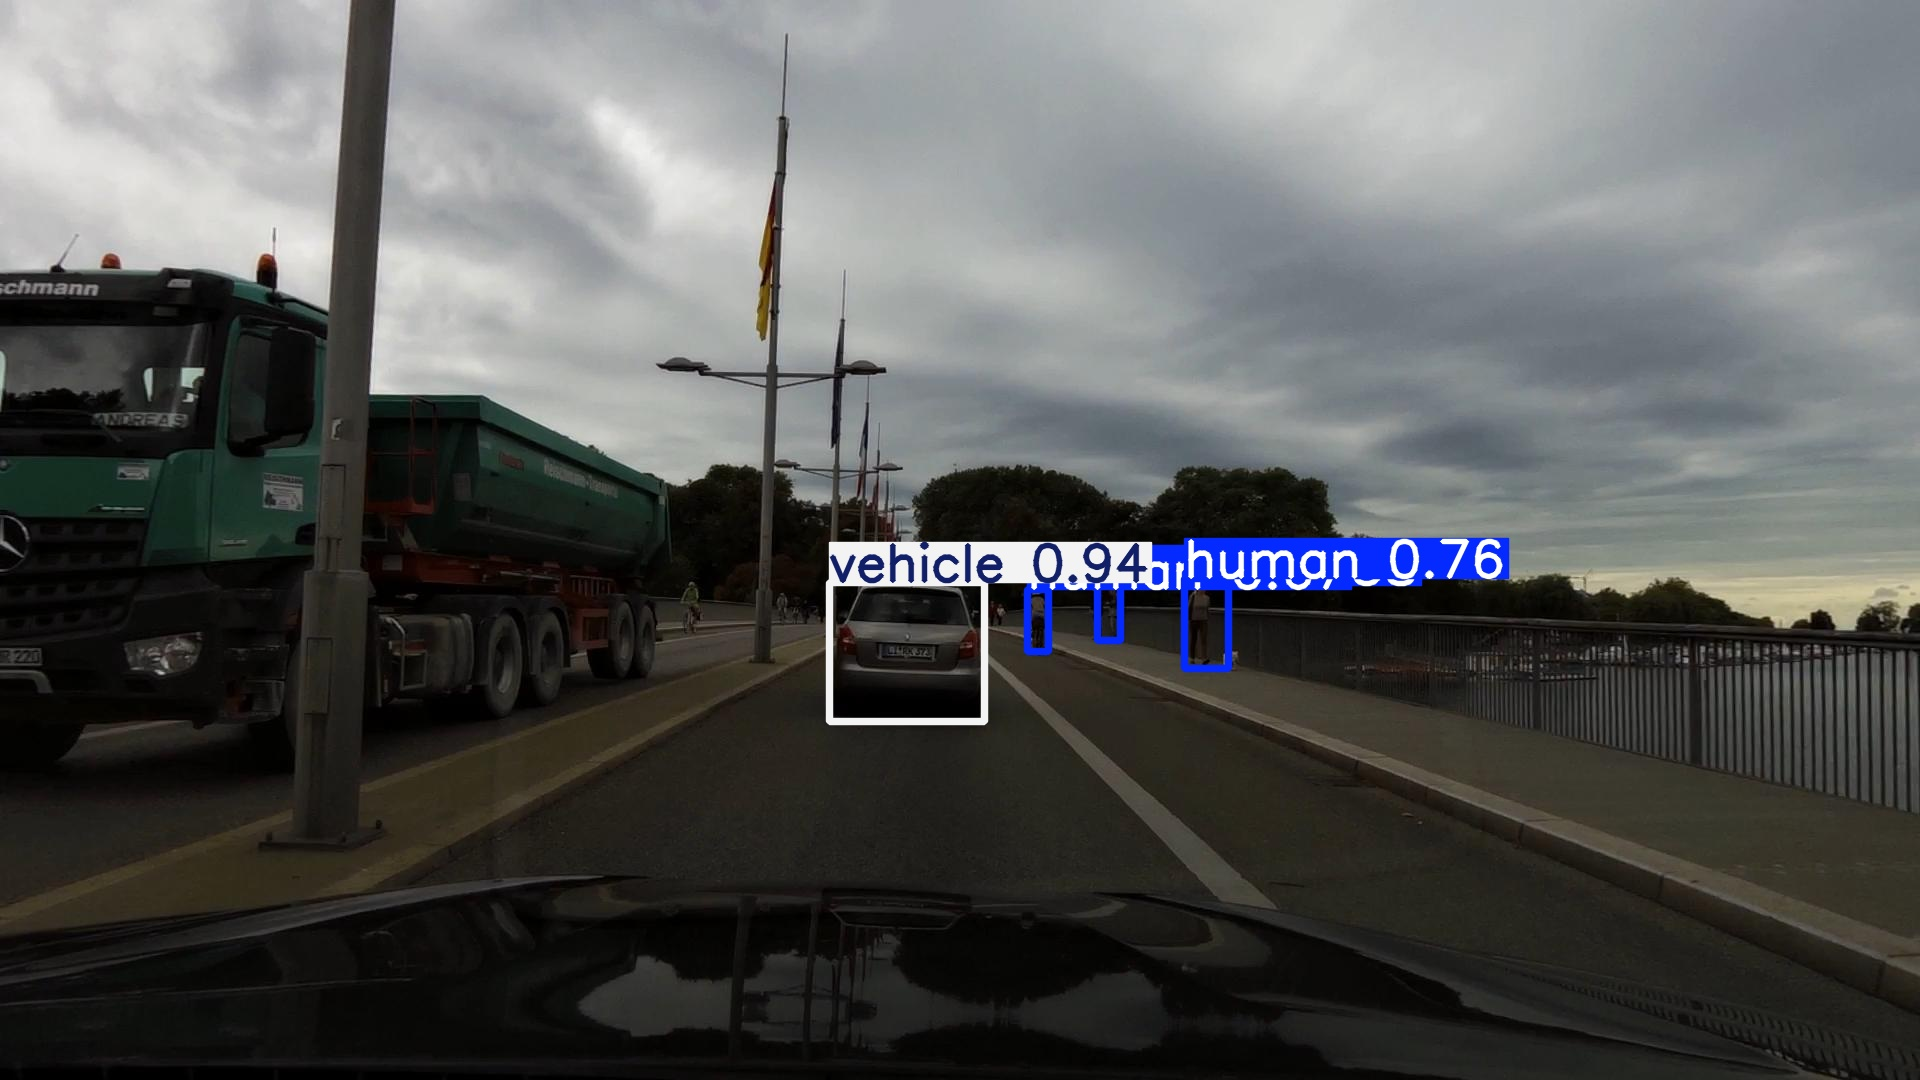

Showing: ti_lindau_V105_2015sept_100_VIRB_VIRB0031_0m_10m_I00001.jpg


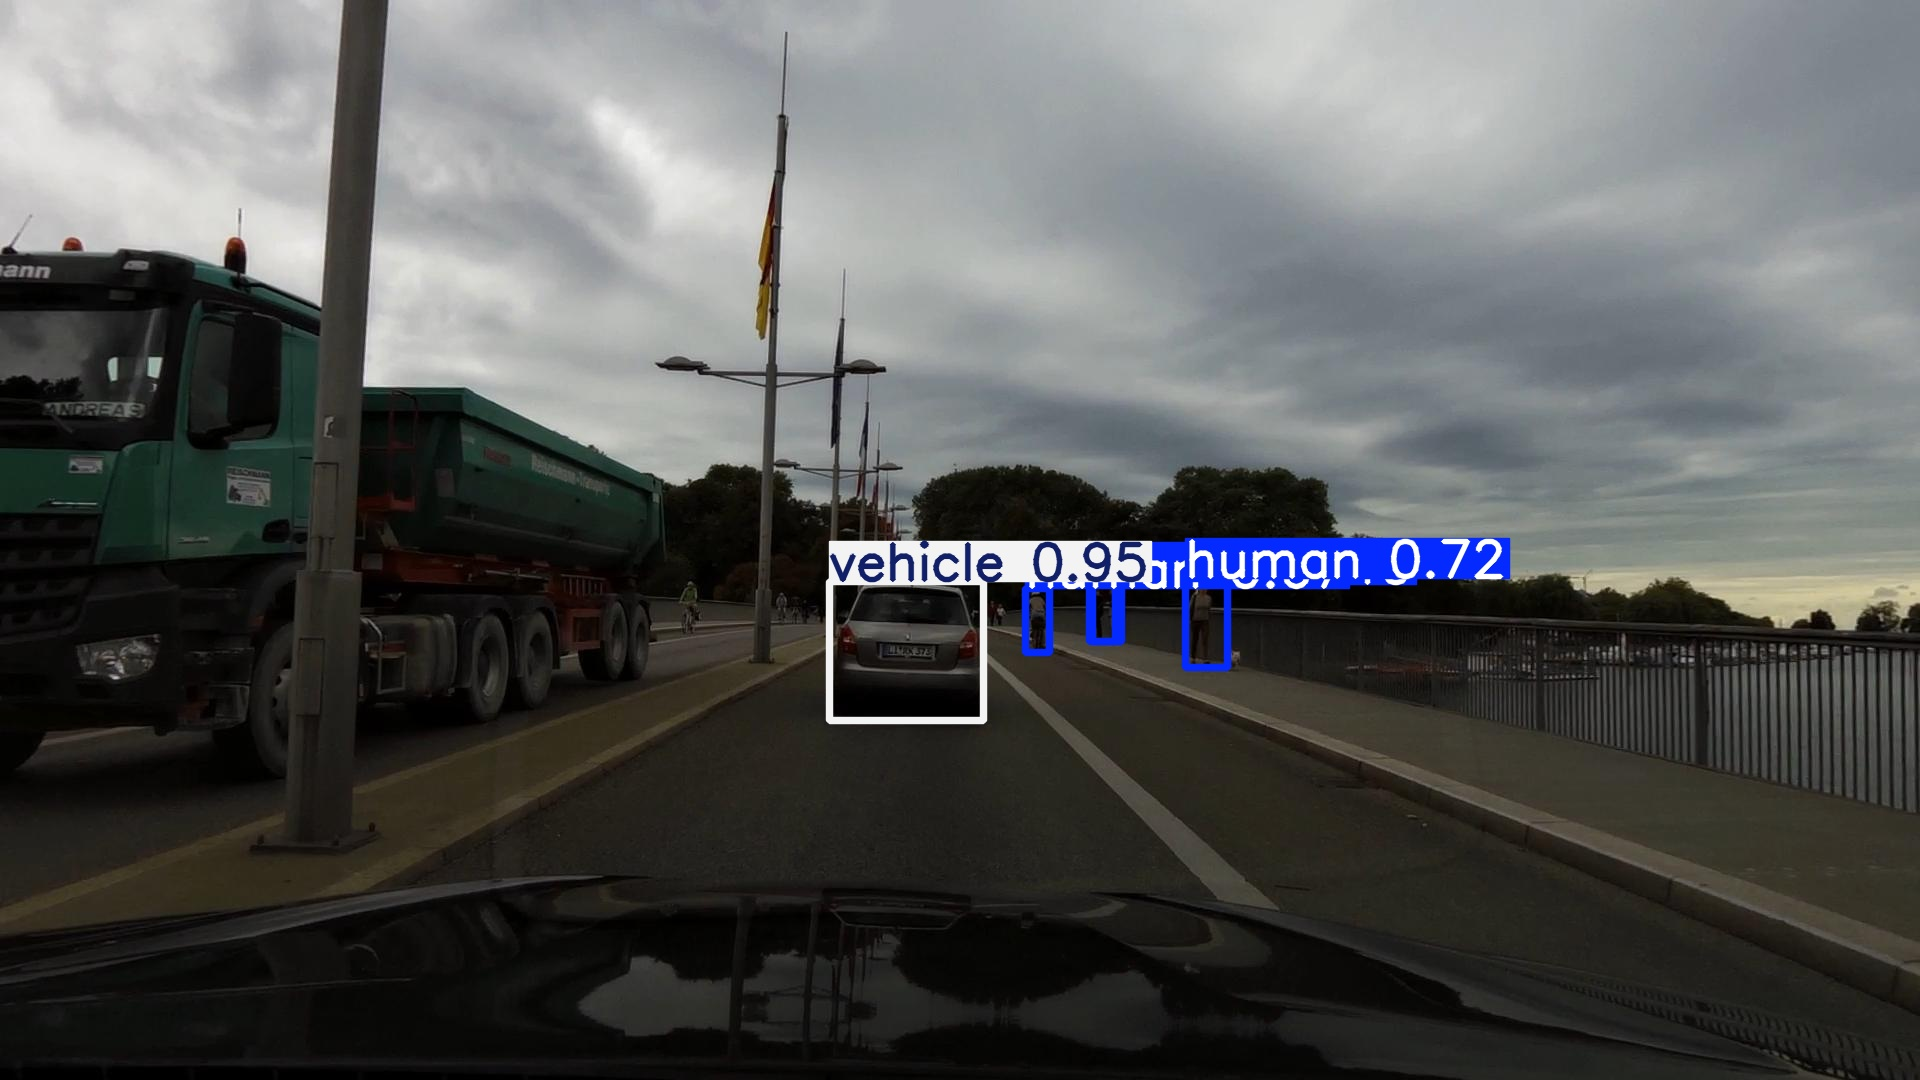

Showing: ti_lindau_V105_2015sept_100_VIRB_VIRB0031_0m_10m_I00025.jpg


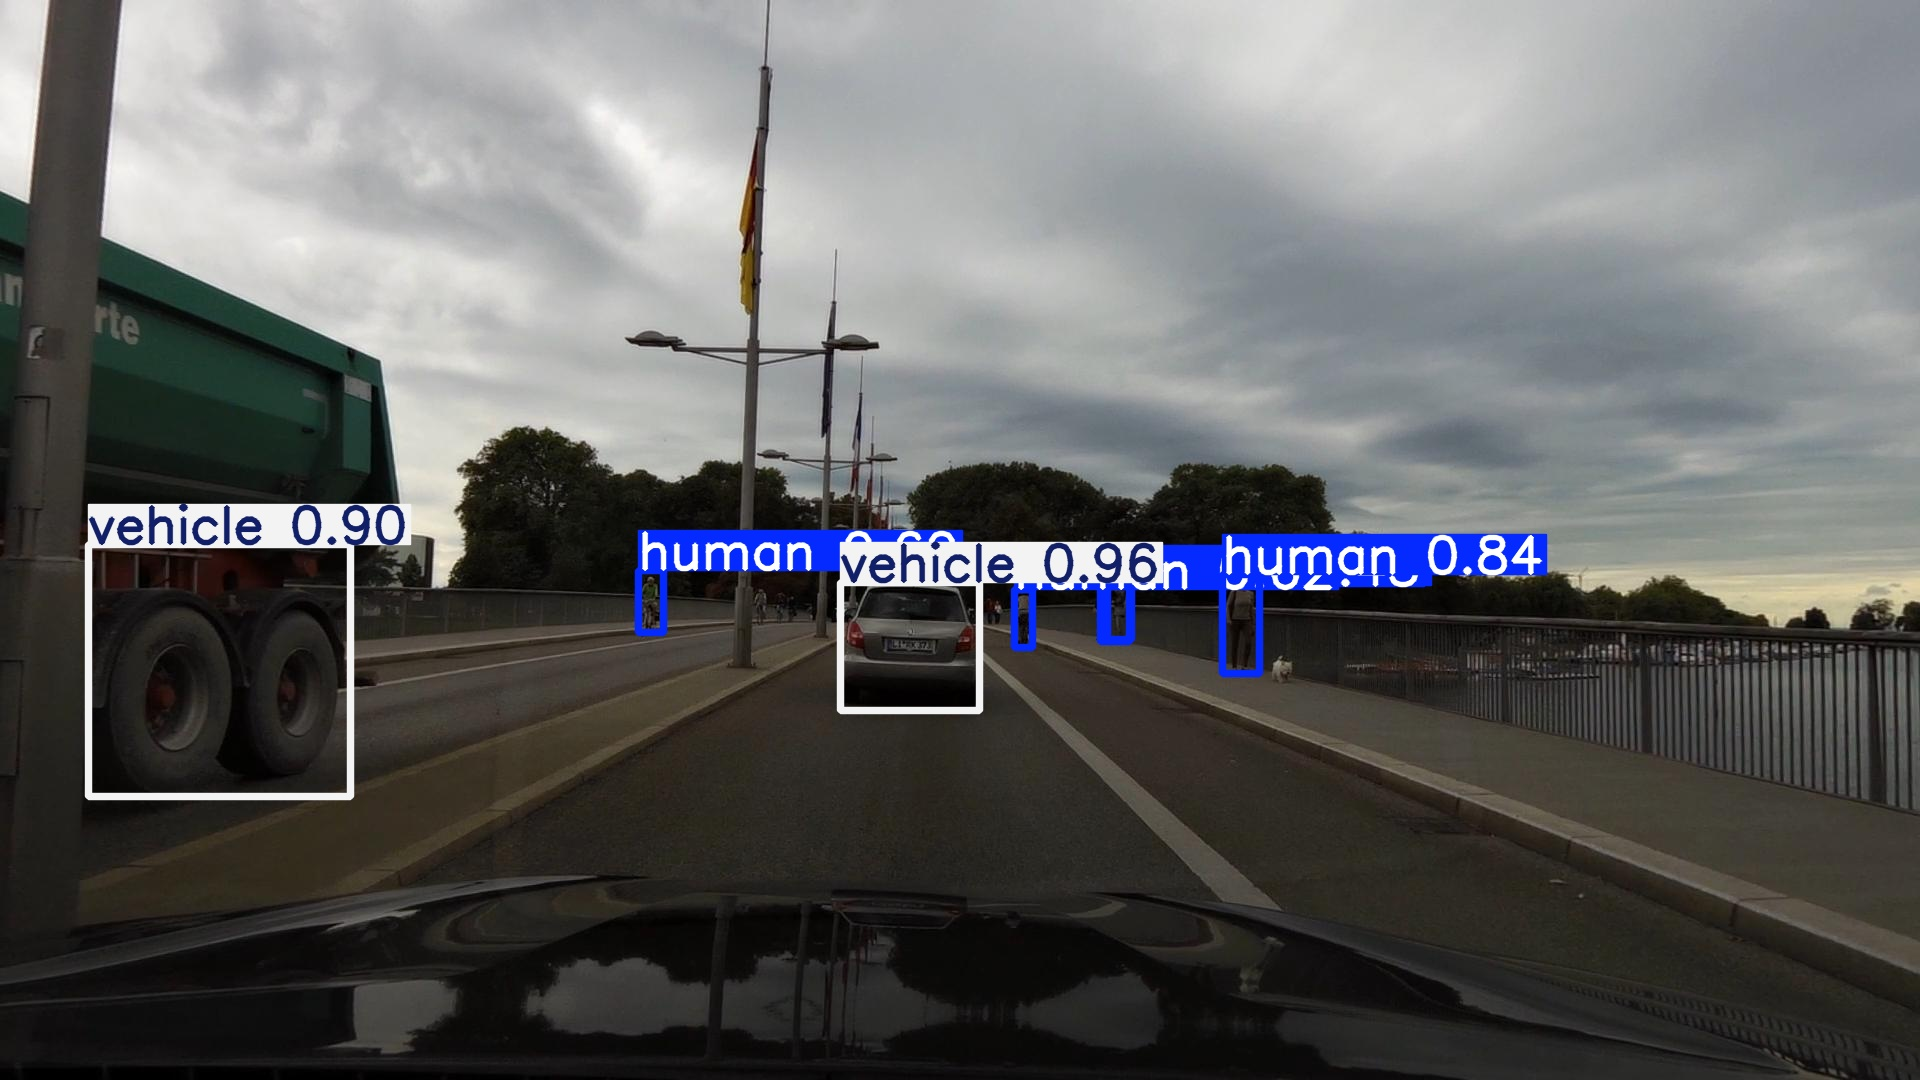

In [6]:
from IPython.display import Image, display

# 找刚刚输出的目录
example_dir = os.path.join(OUTPUT_DIR, "examples")
example_files = [f for f in os.listdir(example_dir) if f.lower().endswith((".jpg", ".jpeg", ".png"))]
example_files = sorted(example_files)

print("Example prediction files:", example_files[:5])

# 显示前 3 张
for f in example_files[:3]:
    print(f"Showing:", f)
    display(Image(filename=os.path.join(example_dir, f)))
